<a href="https://colab.research.google.com/github/Daarwinmendez/Miami_housing_price_prediction/blob/main/Miami_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

## MIAMI HOUSING DATASET

This dataset was sourced from Kaggle, specifically from this link: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

Special thanks to DeepContractor for making this dataset available.

Thanks to DeepContractor I'm bringing this here today.


The dataset contains the following columns:

* PARCELNO: unique identifier for each property. About 1% appear multiple times.
* SALE_PRC: sale price ($)

* LND_SQFOOT: land area (square feet)
* TOT_LVG_AREA: floor area (square feet)
* SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
* RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
* OCEAN_DIST: distance to the ocean (feet)
* WATER_DIST: distance to the nearest body of water (feet)
* CNTR_DIST: distance to the Miami central business district (feet)
* SUBCNTR_DI: distance to the nearest subcenter (feet)
* HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
* age: age of the structure
* avno60plus: dummy variable for airplane noise exceeding an acceptable level
* structure_quality: quality of the structure
* month_sold: sale month in 2016 (1 = jan)
* LATITUDE
* LONGITUDE

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d deepcontractor/miami-housing-dataset


Dataset URL: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset
License(s): CC0-1.0
miami-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Uncompress the kaggle dataset
!unzip miami-housing-dataset.zip

Archive:  miami-housing-dataset.zip
  inflating: miami-housing.csv       


In [ ]:
  # Import the data
housing_df = pd.read_csv("miami-housing.csv")

In [ ]:
# Show the first 5 rows of the dataset
housing_df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
# Show the last 5 rows of the Dataframe
housing_df.tail()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4
13931,25.784387,-80.258901,131320040700,250000.0,8833,1867,266,3793.9,20859.6,3421.0,21928.6,12599.0,474.7,62,0,11,4


In [ ]:
# See the size of the dataFrame  (Meaning product of rows * columns)
housing_df.size

236844

In [ ]:
housing_df.shape # See the shape of the dataframe

(13932, 17)

In [ ]:
housing_df.columns # See the features (Columns of the dataset)

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [ ]:
housing_df.dtypes # See the data types of the Dataset

,0
LATITUDE,float64
LONGITUDE,float64
PARCELNO,int64
SALE_PRC,float64
LND_SQFOOT,int64
TOT_LVG_AREA,int64
SPEC_FEAT_VAL,int64
RAIL_DIST,float64
OCEAN_DIST,float64
WATER_DIST,float64


In [ ]:
housing_df.info() # See cartain info about it to know the df better.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [ ]:
housing_df.isna().sum() # See the missin values (0) in this case == Clean Data

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


In [ ]:
housing_df.describe() # Describe my data, show std, min, 25%, 50%, 75%, and max by rows

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [ ]:
# Import standardScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
# Import certain dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate target from features
X = housing_df.drop(columns=['SALE_PRC'])
y = housing_df['SALE_PRC']

# Separate 80 / 20 == 100 for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X_train and X_test with standard Scaler to standarize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Linear Regression model and fit it to the data
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# see the accuracy of the model on test split
reg.score(X_test_scaled, y_test)

0.7096473683383338

In [ ]:
# Save and see the predictions
y_preds = reg.predict(X_test_scaled)

y_preds

array([331907.70885066, 390210.23606657, 438998.46615652, ...,
       414456.7407805 , 644421.30167683,  67409.20087146])

In [ ]:

# Import cross val_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline # Import the pipeline module


# Instantiate Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])


# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring="neg_mean_absolute_error")

# Print the mean of the scores
print(np.mean(-scores))


128940.53856961611


In [ ]:
# Import Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create a dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}


# Create an empty dictionary
model_results = {}

# Fit and score the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    model_results[name] = model.score(X_test_scaled, y_test)

In [ ]:
print(np.max(list(model_results.values()))) # See the best model

0.7096673743918999


In [ ]:
print(model_results) # See the results of the models

{'LinearRegression': 0.7096473683383338, 'Ridge': 0.7096673743918999, 'Lasso': 0.7096500377225632, 'ElasticNet': 0.6732416712205292}


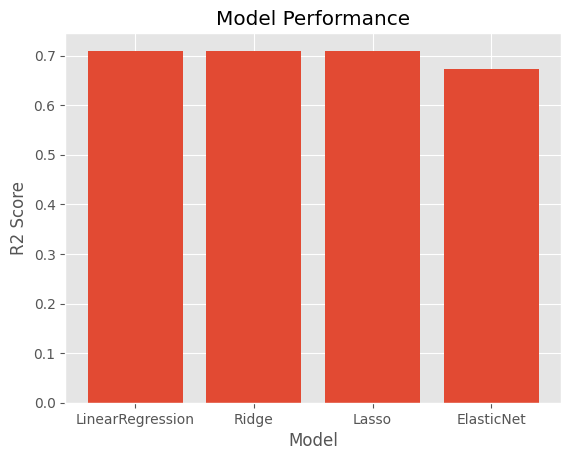

In [ ]:
# Create a bar plot of the models
fig, ax = plt.subplots()

# Plot the results
ax.bar(model_results.keys(), model_results.values())

# Set the title and labels
ax.set_xlabel("Model")
ax.set_ylabel("R2 Score")
ax.set_title("Model Performance")
plt.show()

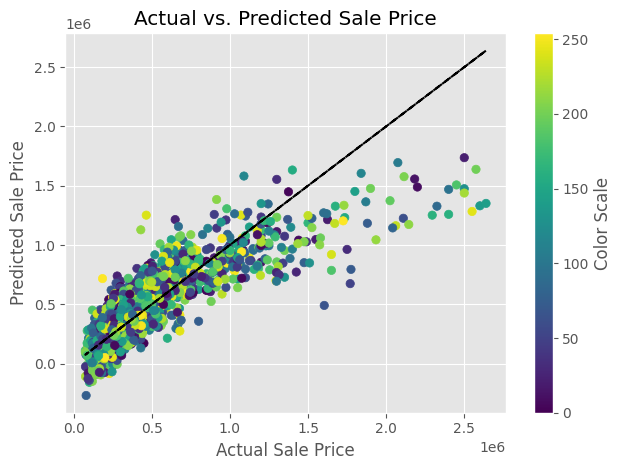

In [ ]:
# Create a figure for a scatter plot
fig, ax = plt.subplots()


# Create a colors randomly distributed numbers between 0 and 255
colors = np.random.randint(0, 255, len(y_test))



# Create a scatter plot of the actual vs. predicted sale prices
scatter = ax.scatter(y_test, y_preds, c=colors, cmap="viridis")

# Create a color bar for the scatter
cbar = plt.colorbar(scatter)
cbar.set_label("Color Scale")

# Draw the regression line on the scatter
plt.plot(y_test, y_test, color="black", linestyle="--")

# Setting title, y and x labels
ax.set(
    xlabel="Actual Sale Price",
    ylabel="Predicted Sale Price",
    title="Actual vs. Predicted Sale Price"
)


plt.tight_layout()
plt.show()

In [ ]:
# Create a ridge pipeline and at the same time standarize it
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Ridge())
])

In [ ]:
# We see how close we're to even having a 90%, I think we've got to use hyperparameters tuning
from sklearn.model_selection import GridSearchCV


# Tuning hyperparameter
hyper_parameters = {'regressor__alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge_pipeline, hyper_parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                              1, 5, 10, 20, 30, 35, 40, 45, 50,
                                              55, 100]},
             scoring='r2')

In [ ]:
ridge_regressor.best_params_ # Getting the best parameters

{'regressor__alpha': 5}

In [ ]:
ridge_regressor.best_score_ # Getting the best score

0.7139349018655518

In [ ]:
ridge_regressor.score(X_test_scaled, y_test) # Getting the score of the model

0.7097391258061617

In [ ]:
hyper_parameters = {'regressor__alpha':[5]} # Testing again
ridge_regressor = GridSearchCV(ridge_pipeline, hyper_parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [5]}, scoring='r2')

In [ ]:
ridge_regressor.best_params_ # Doing the same to see if get more than 0.71

{'regressor__alpha': 5}

In [ ]:
ridge_regressor.best_score_ # Getting the best score

0.7139349018655518

In [ ]:
ridge_regressor.score(X_test_scaled, y_test) # Getting the score of the model

0.7097391258061617

In [ ]:
y_preds = ridge_regressor.predict(X_test_scaled) # Getting the predictions
y_preds

array([332480.63241892, 390438.11463336, 438544.56582632, ...,
       413775.36346083, 644701.04951321,  67424.03005503])

In [ ]:
# Creating a comparison dataframe
comparison = pd.DataFrame({
    "Actual Sale Price": y_test,
    "Predicted Sale Price": y_preds,
    "Difference": y_test - y_preds
})


comparison.head()

,Actual Sale Price,Predicted Sale Price,Difference
6442,380000.0,332480.632419,47519.367581
8524,312000.0,390438.114633,-78438.114633
13210,330000.0,438544.565826,-108544.565826
2501,805000.0,699448.629582,105551.370418
168,210000.0,470835.079563,-260835.079563


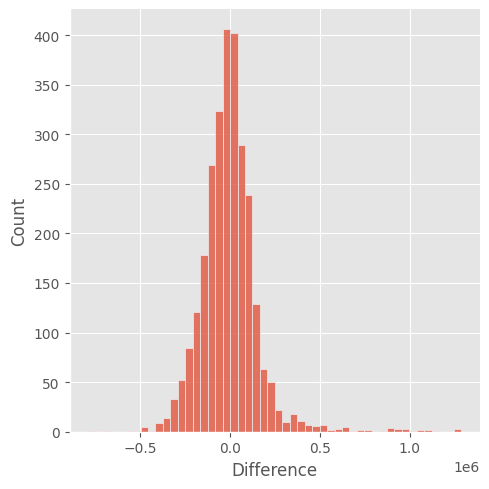

In [ ]:
sns.displot(comparison, x="Difference", bins=50) # Create a dist plot to see the differences

In [ ]:
# Saving my model
from joblib import dump, load

dump(ridge_regressor, "model.joblib")

['model.joblib']